In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1: el periodo de un oscilador anharmónico

El oscilador harmónico aparece en múltiples problemas físicos y su comportamiento puede estudiarse por medio de métodos analíticos.  
Su principal propiedad es que su periodo de oscilación es constante e independiente de la amplitud del movimiento.  
Un oscilador clásico puede interpretarse como una partícula en un pozo cóncavo que, desplazado del punto de equilibrio, se balancea alrededor de él.

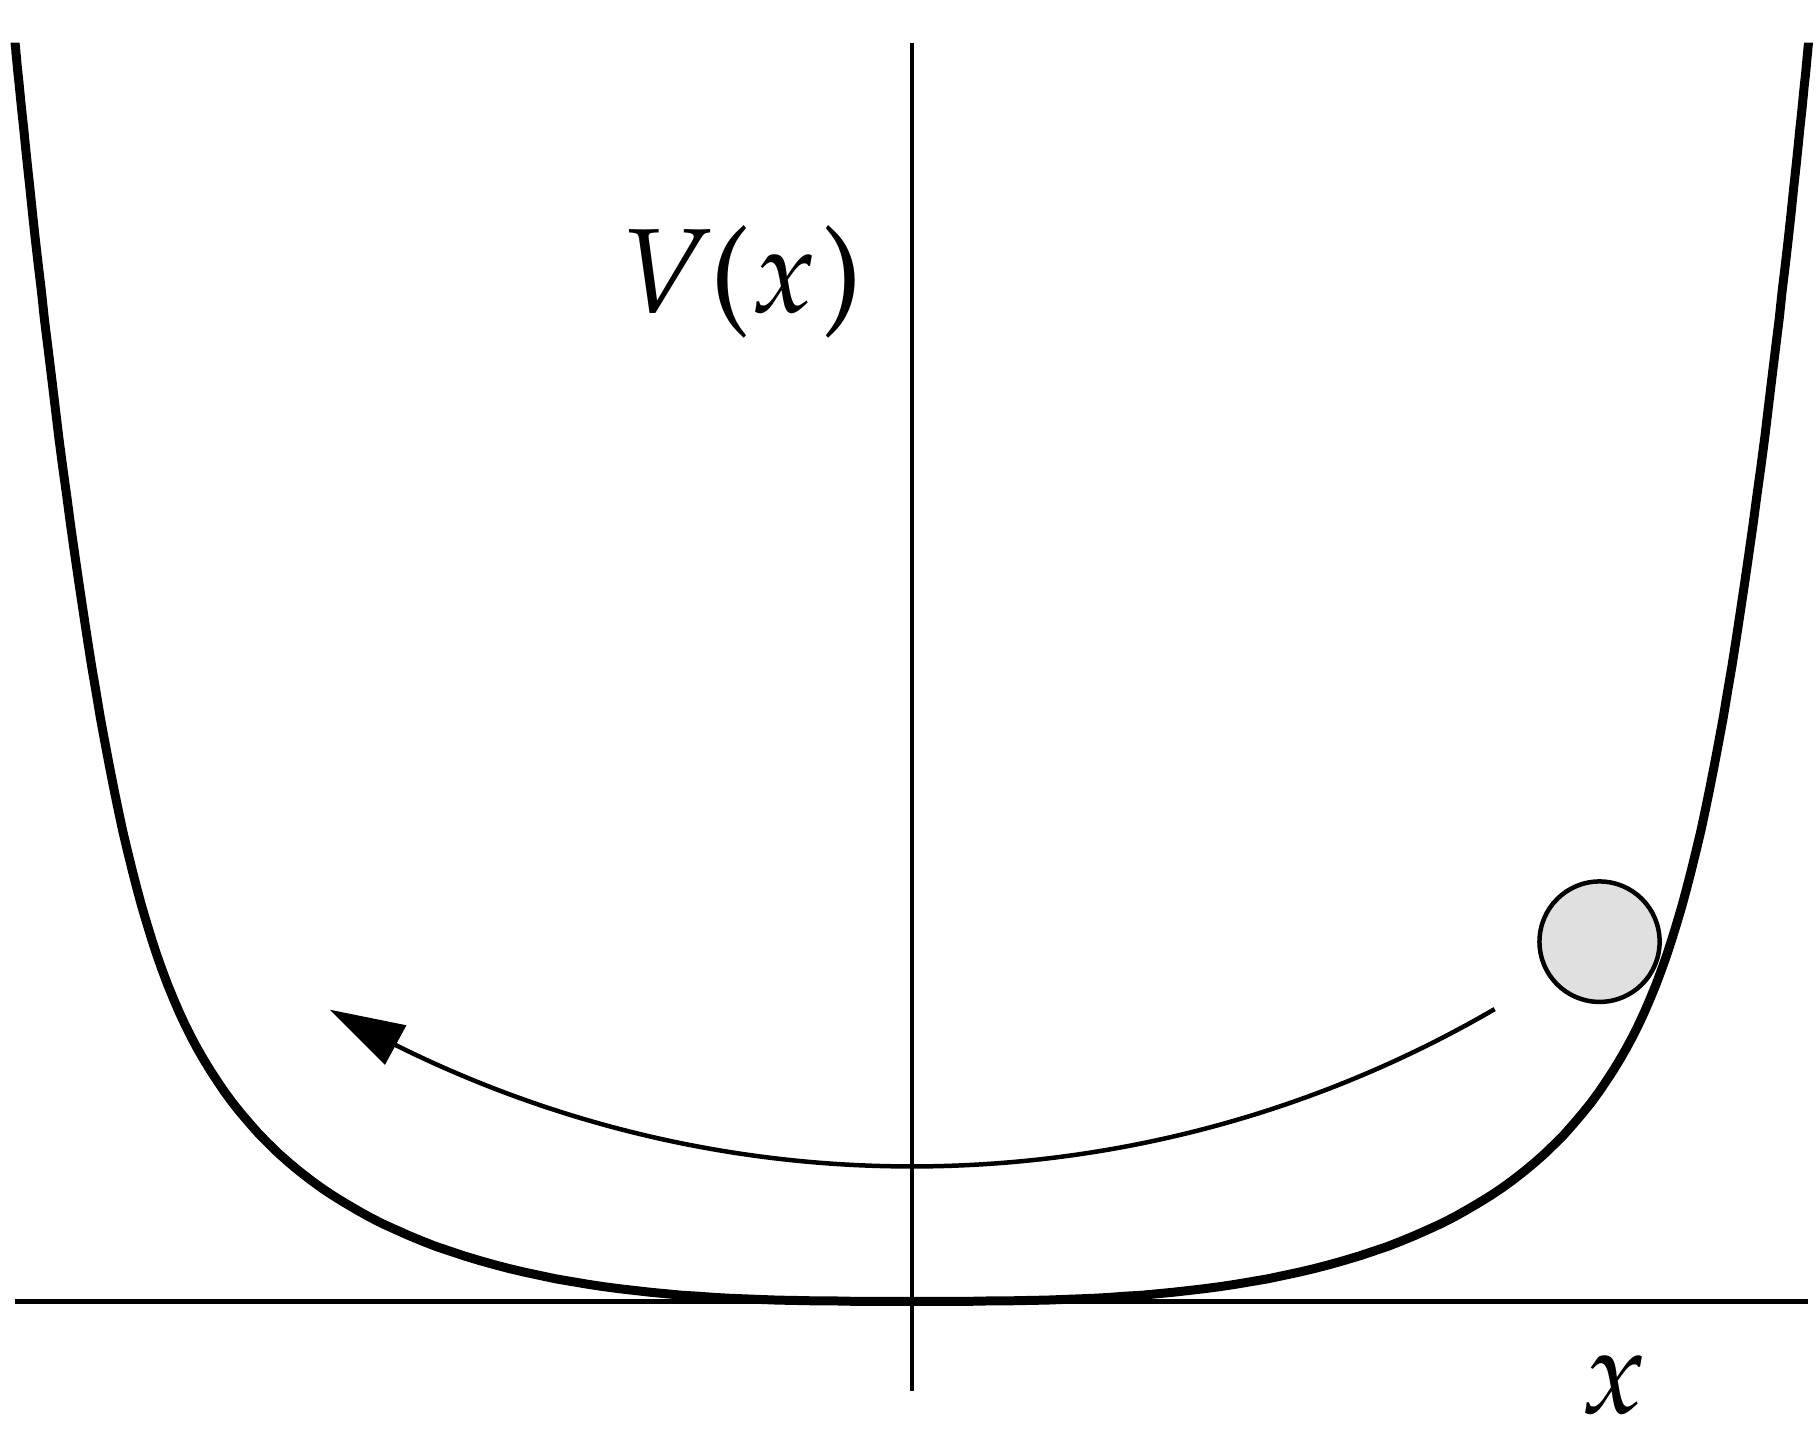

In [13]:
display(Image(filename ="anharmonic_oscillator.png", width=450, height=450))

Donde el potencial es $V(x)\propto x^2$. Cualquier otro potencial define un oscilador anharmónico. La forma más fácil de estudiar el movimiento de un oscilador es aplicar la conservación de la energía

$$E=\frac{1}{2}m\,\dot x^2+V(x),$$

que para $V(x)\neq x^2$ representa una ecuación no lineal.  
Asumamos que el potencial es simétrico respecto a x=0.  
Perturbemos entonces nuestra partícula desplazándola a una posición $x=a$ en $t=0$, que satisface que $\dot x=0$ y $E= V(a)$.

1. Cuando la partícula llega al origen ha recorrido un cuarto de su periodo. Demostrar que el periodo $(T)$ viene dado por:

$$T=\sqrt{8m}\,\int\limits_0^a\frac{\text{d}x}{\sqrt{V(a)-V(0)}}.$$

2. Asumir ahora que el potencial es $V(x)=x^4$ y la masa de la partícula es m=1.  
   Escribir un programa que calcule el periodo del oscilador para una amplitud inicial $a$ usando la cuadratura gaussiana con $N=20$ puntos. 

3. Representa el periodo para valores de la amplitud en el intervalo $[0,2]$.

4. El resultado muestra que la partícula se mueve más rápido (el periodo disminuye) al aumentar el valor de la amplitud.   
   ¿Cómo es posible si la partícula tiene que recorrer una mayor distancia? El periodo diverge cuando a=0. ¿Cual es la razón?

---

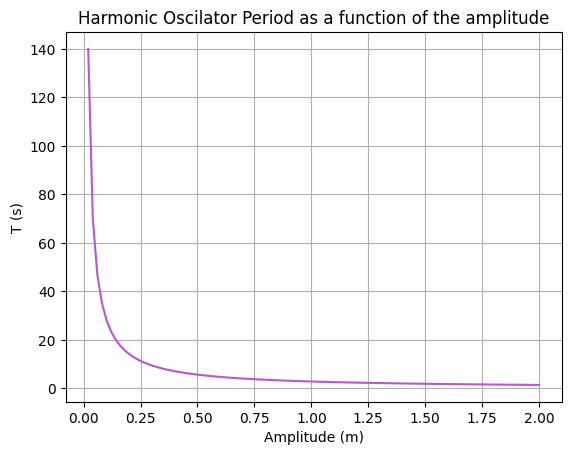

In [14]:
def V(x):
    return x**4

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3, 4*N-1, N)/(4*N + 2)
    x = np.cos(np.pi*a + 1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def T(m, a):
    x, w = gaussxwab(20, 0, a)
    def f(x):
        return 1/np.sqrt(V(a) - V(0))
    
    I = 0
    for i in range(len(x)):
        I += w[i]*f(x[i])
    return np.sqrt(8*m)*I

x = np.linspace(0, 2, 100)
y = [T(1, xp) for xp in x]

plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.title('Harmonic Oscilator Period as a function of the amplitude')
plt.xlabel('Amplitude (m)')
plt.ylabel('T (s)')
plt.show()

El período disminuye al aumentar la amplitud porque la partícula adquiere mayor energía mecánica (tanto cinética como potencial) para mayores amplitudes. Además, el período diverge para a = 0 porque no se trata de un oscilador armónico si la amplitud máxima es nula.